In [1]:
library(tidyverse)

── Attaching core tidyverse packages ───────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ─────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [7]:
data(mtcars)

In [8]:
flotte <- mtcars

In [10]:
mean(flotte$wt)

[1] 3.21725

In [12]:
max(flotte$wt)

[1] 5.424

In [42]:
flotte[which.min(flotte$mpg), ]

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,efficacite
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cadillac Fleetwood,10.4,8,472,205,2.93,5.25,17.98,0,0,3,4,0.05073171


In [27]:
flotte$efficacite <- flotte$mpg / flotte$hp

In [44]:
flotte[which.max(flotte$efficacite),]

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,efficacite
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2,0.5846154


# Ex 2

In [34]:
duree <- c(12,14,10,11,15,16)

In [35]:
mean(duree)

[1] 13

In [36]:
median(duree)

[1] 13

In [37]:
sd(duree)

[1] 2.366432

In [38]:
sort(duree)

[1] 10 11 12 14 15 16

In [39]:
duree[duree > 13]

[1] 14 15 16

# Ex 3

In [52]:
serie = list( produits = c('A','B','C'), quantites = c(20,35,45))

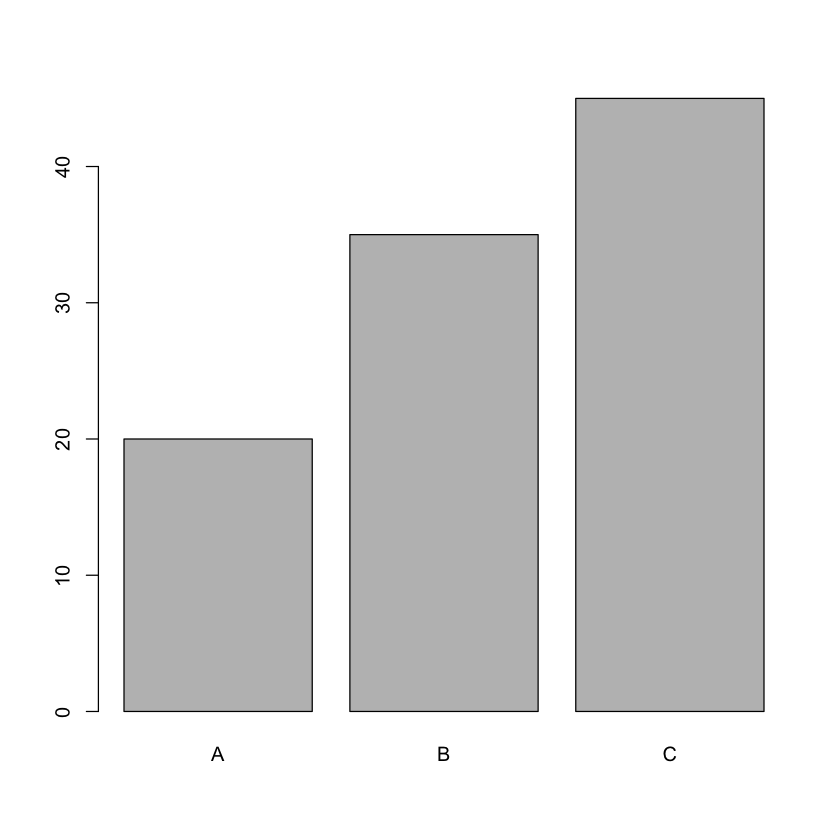

In [58]:
barplot(height= serie[[2]], names=serie[[1]])

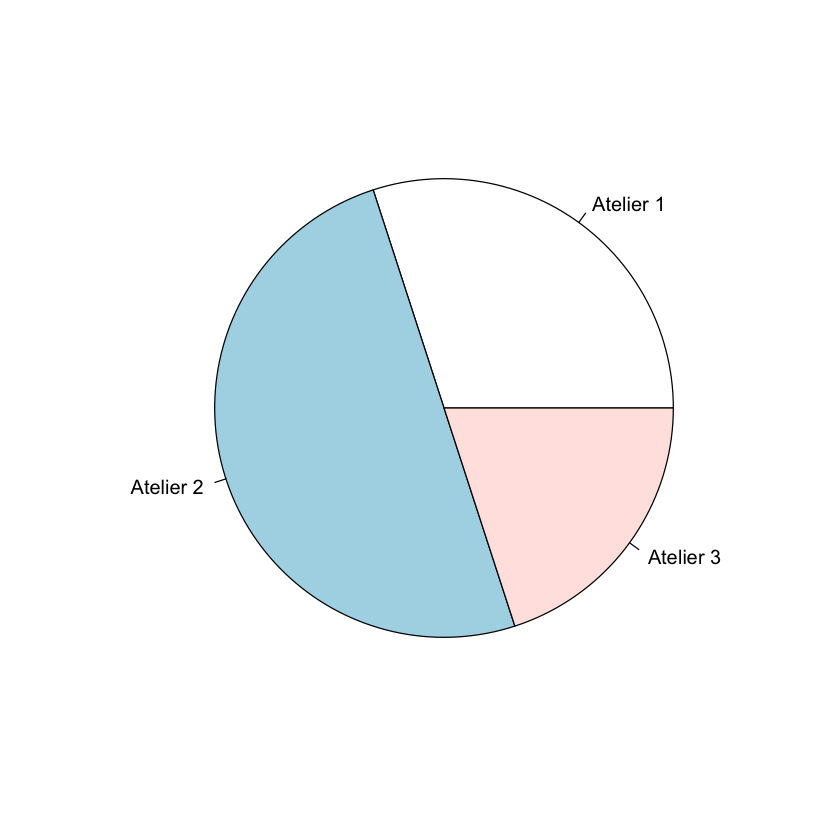

In [60]:
pie(c(30,50,20), labels = c("Atelier 1","Atelier 2","Atelier 3"))

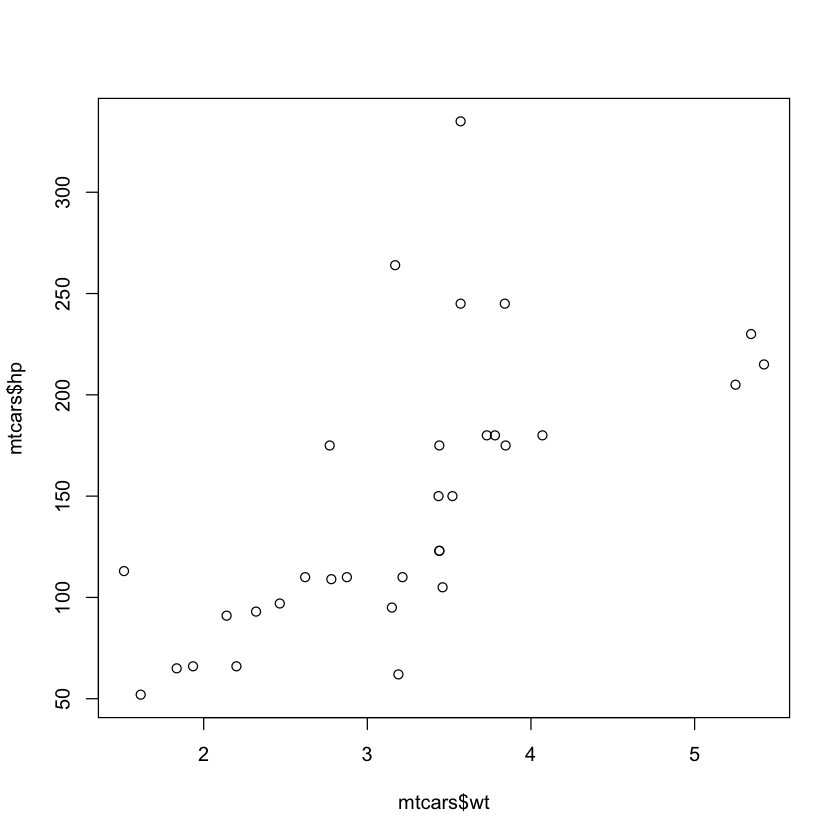

In [61]:
plot(mtcars$hp ~ mtcars$wt)

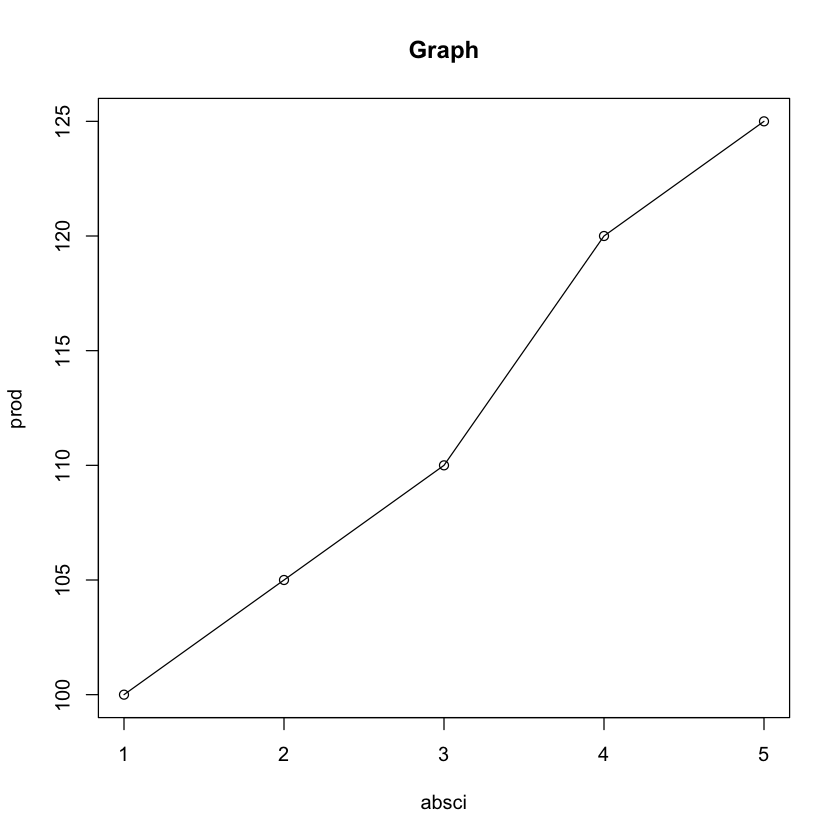

In [1]:
prod <- c(100,105,110,120,125)
absci <- c(1,2,3,4,5)
plot(prod ~ absci)
lines(prod ~ absci)
title(main= "Graph")

# Ex 4

In [68]:
donnes <-  c(12, 18, 13, 14, 17,
18, 10, 11, 14, 15,
15, 12, 13, 15, 16)
matrice <- matrix(donnes, nrow=3, byrow=TRUE)

In [69]:
matrice

12,18,13,14,17
18,10,11,14,15
15,12,13,15,16


In [127]:
cbind(matrice,totaux = marginSums(matrice, 1))

,,,,,totaux
12,18,13,14,17,74
18,10,11,14,15,68
15,12,13,15,16,71


In [142]:
 inter <-matrix(apply(matrice,1,cumsum), nrow=3, byrow=TRUE)
inter

12,30,43,57,74
18,28,39,53,68
15,27,40,55,71


In [153]:
freq_cum_relat <- cbind(inter[,1:4]/inter[,5], Totaux = c(100,100,100))
rownames(freq_cum_relat) <- c("Y1","Y2","Y3")
freq_cum_relat

,,,,,Totaux
Y1,0.1621622,0.4054054,0.5810811,0.7702703,100
Y2,0.2647059,0.4117647,0.5735294,0.7794118,100
Y3,0.2112676,0.3802817,0.5633803,0.7746479,100


# Ex 5

In [77]:
data <- data.frame(
id_produit = c("P1", "P2", "P3", "P4"),
janv = c(120, 200, 80, 50),
fev = c(115, 195, 85, 55),
mars = c(110, 193, 87, 60),
avril = c(105, 190, 89, 65),
mai = c(100, 188, 92, 70),
juin = c(95, 185, 95, 75)
)

In [81]:
library(tidyverse)

In [89]:
data_long <- pivot_longer(data, cols = c("janv", "fev","mars","avril","mai","juin"))
data_long

id_produit,name,value
<chr>,<chr>,<dbl>
P1,janv,120
P1,fev,115
P1,mars,110
P1,avril,105
P1,mai,100
P1,juin,95
P2,janv,200
P2,fev,195
P2,mars,193


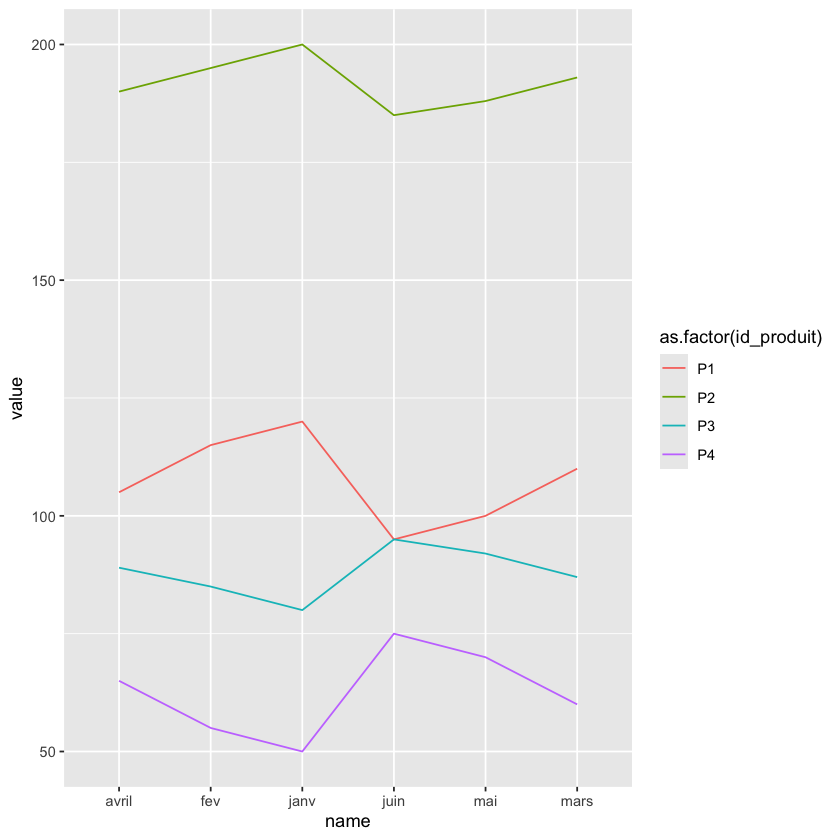

In [93]:
ggplot() + 
geom_line(data= data_long, aes(x=name, y=value,group=id_produit,color= as.factor(id_produit)))

In [170]:
mois = 2:7
data$juillet <- apply(data[, mois], 1, function(x) { # applies over rows
  model <- lm(x ~ mois, data = data.frame(mois, x))  # lm:Régression linéaire
  predict(model, newdata = data.frame(mois = 8))  # ax+b
})

data


id_produit,janv,fev,mars,avril,mai,juin,juillet
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
P1,120,115,110,105,100,95,90.0000
P2,200,195,193,190,188,185,181.9333
P3,80,85,87,89,92,95,97.8000
P4,50,55,60,65,70,75,80.0000


In [171]:
data_long <- pivot_longer(data, cols = c("janv", "fev","mars","avril","mai","juin", "juillet"))
data_long

id_produit,name,value
<chr>,<chr>,<dbl>
P1,janv,120.0000
P1,fev,115.0000
P1,mars,110.0000
P1,avril,105.0000
P1,mai,100.0000
P1,juin,95.0000
P1,juillet,90.0000
P2,janv,200.0000
P2,fev,195.0000


In [172]:
predictions <- data_long[data_long$name == "juillet",]

In [173]:
data_long$name <- factor(data_long$name, levels = c("janv", "fev","mars","avril","mai","juin", "juillet")) # tri dans l'ordre

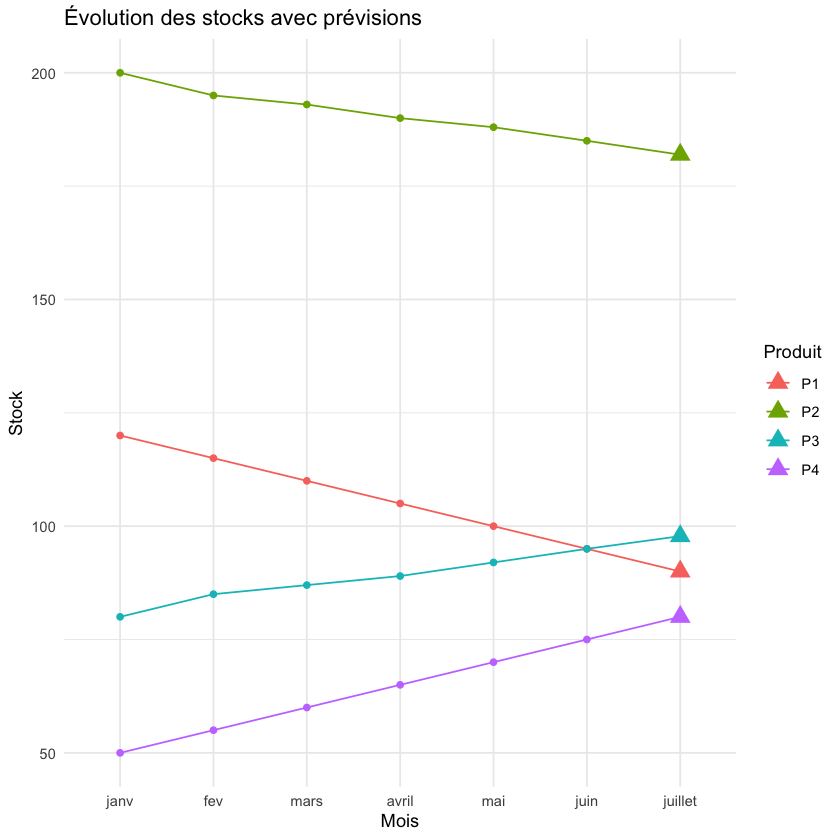

In [174]:
ggplot() + 
geom_line(data= data_long, aes(x=name, y=value,group=id_produit,color= as.factor(id_produit))) +
    geom_point(data = data_long, aes(x = name, y = value, color = as.factor(id_produit))) +
  geom_point(data = predictions, aes(x = name, y = value, color = as.factor(id_produit)), shape = 17, size = 4) +  #  Triangle pour prévision
  theme_minimal() +
  labs(title = "Évolution des stocks avec prévisions", x = "Mois", y = "Stock", color = "Produit")



In [2]:
?'~'

tilde {base},R Documentation
"y, model",symbolic expressions.


In [3]:
?formula

formula {stats},R Documentation
"x, object","R object, for DF2formula() a data.frame."
...,further arguments passed to or from other methods.
env,"the environment to associate with the result, if not already a formula."
showEnv,logical indicating if the environment should be printed as well.
